In [84]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [85]:
import pandas as pd

In [86]:
train = pd.read_csv('/content/drive/MyDrive/aug_train.csv')
test = pd.read_csv('/content/drive/MyDrive/aug_test.csv')

In [87]:
train.shape

(19158, 14)

In [88]:
test.shape

(2129, 13)

In [89]:
train.describe()

,enrollee_id,city_development_index,training_hours,target
count,19158.000000,19158.000000,19158.000000,19158.000000
mean,16875.358179,0.828848,65.366896,0.249348
std,9616.292592,0.123362,60.058462,0.432647
min,1.000000,0.448000,1.000000,0.000000
25%,8554.250000,0.740000,23.000000,0.000000
50%,16982.500000,0.903000,47.000000,0.000000
75%,25169.750000,0.920000,88.000000,0.000000
max,33380.000000,0.949000,336.000000,1.000000


In [90]:
train.head(n=5)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [91]:
train.tail()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,NaN,NaN,1,42,1.0
19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,NaN,NaN,4,52,1.0
19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4,44,0.0
19156,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,NaN,<1,500-999,Pvt Ltd,2,97,0.0
19157,23834,city_67,0.855,NaN,No relevent experience,no_enrollment,Primary School,NaN,2,NaN,NaN,1,127,0.0


In [92]:
train.dtypes

enrollee_id                 int64
city                       object
city_development_index    float64
gender                     object
relevent_experience        object
enrolled_university        object
education_level            object
major_discipline           object
experience                 object
company_size               object
company_type               object
last_new_job               object
training_hours              int64
target                    float64
dtype: object

In [93]:
train.nunique()

enrollee_id               19158
city                        123
city_development_index       93
gender                        3
relevent_experience           2
enrolled_university           3
education_level               5
major_discipline              6
experience                   22
company_size                  8
company_type                  6
last_new_job                  6
training_hours              241
target                        2
dtype: int64

In [23]:
train.drop(['enrollee_id'],axis=1,inplace=True)

In [24]:
train.nunique()

city                      123
city_development_index     93
gender                      3
relevent_experience         2
enrolled_university         3
education_level             5
major_discipline            6
experience                 22
company_size                8
company_type                6
last_new_job                6
training_hours            241
target                      2
dtype: int64

In [27]:
train.isna().sum()

city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

In [28]:
train['gender'].value_counts()

Male      13221
Female     1238
Other       191
Name: gender, dtype: int64

In [29]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    19158 non-null  object 
 1   city_development_index  19158 non-null  float64
 2   gender                  14650 non-null  object 
 3   relevent_experience     19158 non-null  object 
 4   enrolled_university     18772 non-null  object 
 5   education_level         18698 non-null  object 
 6   major_discipline        16345 non-null  object 
 7   experience              19093 non-null  object 
 8   company_size            13220 non-null  object 
 9   company_type            13018 non-null  object 
 10  last_new_job            18735 non-null  object 
 11  training_hours          19158 non-null  int64  
 12  target                  19158 non-null  float64
dtypes: float64(2), int64(1), object(10)
memory usage: 1.9+ MB


In [30]:
train['gender'] = train['gender'].map({'Female':0,'Male':1,'Other':2})

In [31]:
train.head()

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,city_103,0.920,1.0,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,city_40,0.776,1.0,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,city_162,0.767,1.0,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [32]:
train['gender'].fillna(train['gender'].mode()[0], inplace=True)

In [33]:
train.head()

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,city_103,0.920,1.0,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,city_40,0.776,1.0,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,city_21,0.624,1.0,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,city_115,0.789,1.0,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,city_162,0.767,1.0,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [34]:
train['relevent_experience'] = train['relevent_experience'].map({'No relevent experience':0,'Has relevent experience':1})

In [35]:
train['enrolled_university'].value_counts()

no_enrollment       13817
Full time course     3757
Part time course     1198
Name: enrolled_university, dtype: int64

In [36]:
train['enrolled_university'] = train['enrolled_university'].map({'no_enrollment':0,'Full time course':1,'Part time course':2})

In [37]:
train['education_level'].value_counts()

Graduate          11598
Masters            4361
High School        2017
Phd                 414
Primary School      308
Name: education_level, dtype: int64

In [38]:
train['education_level'] = train['education_level'].map({'Graduate':0,'Masters':1,'High School':2,'Phd':3,'Primary School':4})

In [39]:
train['major_discipline'].value_counts()

STEM               14492
Humanities           669
Other                381
Business Degree      327
Arts                 253
No Major             223
Name: major_discipline, dtype: int64

In [40]:
train['major_discipline'] = train['major_discipline'].map({'STEM':0,'Humanities':1,'Other':2,'Business Degree':3,'Arts':4,'No Major':5})

In [41]:
train['company_size'].value_counts()

50-99        3083
100-500      2571
10000+       2019
10/49        1471
1000-4999    1328
<10          1308
500-999       877
5000-9999     563
Name: company_size, dtype: int64

In [42]:
train['company_size'] = train['company_size'].map({'50-99':0,'100-500':1,'10000+':2,'10/49':3,'1000-4999':4,'<10':5,'500-999':6,'5000-9999':7})

In [43]:
train['company_type'].value_counts()

Pvt Ltd                9817
Funded Startup         1001
Public Sector           955
Early Stage Startup     603
NGO                     521
Other                   121
Name: company_type, dtype: int64

In [44]:
train['company_type'] = train['company_type'].map({'Pvt Ltd':0,'Funded Startup':1,'Public Sector':2,'Early Stage Startup':3,'NGO':4,'Other':5})

In [45]:
train['last_new_job'].value_counts()

1        8040
>4       3290
2        2900
never    2452
4        1029
3        1024
Name: last_new_job, dtype: int64

In [46]:
train['last_new_job'] = train['last_new_job'].map({'1':0,'>4':1,'2':2,'never':3,'4':4,'3':5})

In [47]:
train['last_new_job'].value_counts()

0.0    8040
1.0    3290
2.0    2900
3.0    2452
4.0    1029
5.0    1024
Name: last_new_job, dtype: int64

In [48]:
train['last_new_job'].fillna(train['last_new_job'].mode()[0], inplace=True)

In [49]:
train['company_type'].fillna(train['company_type'].mode()[0], inplace=True)

In [50]:
train['company_size'].fillna(train['company_size'].mode()[0], inplace=True)

In [51]:
train['major_discipline'].fillna(train['major_discipline'].mode()[0], inplace=True)

In [52]:
train.head()

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,city_103,0.920,1.0,1,0.0,0.0,0.0,>20,0.0,0.0,0.0,36,1.0
1,city_40,0.776,1.0,0,0.0,0.0,0.0,15,0.0,0.0,1.0,47,0.0
2,city_21,0.624,1.0,0,1.0,0.0,0.0,5,0.0,0.0,3.0,83,0.0
3,city_115,0.789,1.0,0,NaN,0.0,3.0,<1,0.0,0.0,3.0,52,1.0
4,city_162,0.767,1.0,1,0.0,1.0,0.0,>20,0.0,1.0,4.0,8,0.0


In [53]:
train['experience'].value_counts()

>20    3286
5      1430
4      1403
3      1354
6      1216
2      1127
7      1028
10      985
9       980
8       802
15      686
11      664
14      586
1       549
<1      522
16      508
12      494
13      399
17      342
19      304
18      280
20      148
Name: experience, dtype: int64

In [54]:
train['experience'] = train['experience'].map({'>20':20,'5':5,'4':4,'3':3,'6':6,'2':2,'7':7,'10':10,'9':9,'8':8,'15':15,'11':11,'14':14,'1':1,'-1':-1,'16':16,'12':12,'13':13,'17':17,'18':18,'19':19,'20':20})

In [55]:
train.head()

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,city_103,0.920,1.0,1,0.0,0.0,0.0,20.0,0.0,0.0,0.0,36,1.0
1,city_40,0.776,1.0,0,0.0,0.0,0.0,15.0,0.0,0.0,1.0,47,0.0
2,city_21,0.624,1.0,0,1.0,0.0,0.0,5.0,0.0,0.0,3.0,83,0.0
3,city_115,0.789,1.0,0,NaN,0.0,3.0,NaN,0.0,0.0,3.0,52,1.0
4,city_162,0.767,1.0,1,0.0,1.0,0.0,20.0,0.0,1.0,4.0,8,0.0


In [58]:
train['experience']=train['experience'].fillna(train['experience'].mean())

In [59]:
train.head()

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,city_103,0.920,1.0,1,0.0,0.0,0.0,20.000000,0.0,0.0,0.0,36,1.0
1,city_40,0.776,1.0,0,0.0,0.0,0.0,15.000000,0.0,0.0,1.0,47,0.0
2,city_21,0.624,1.0,0,1.0,0.0,0.0,5.000000,0.0,0.0,3.0,83,0.0
3,city_115,0.789,1.0,0,NaN,0.0,3.0,10.207097,0.0,0.0,3.0,52,1.0
4,city_162,0.767,1.0,1,0.0,1.0,0.0,20.000000,0.0,1.0,4.0,8,0.0


In [60]:
train['enrolled_university'].fillna(train['enrolled_university'].mode()[0], inplace=True)

In [61]:
train.head()

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,city_103,0.920,1.0,1,0.0,0.0,0.0,20.000000,0.0,0.0,0.0,36,1.0
1,city_40,0.776,1.0,0,0.0,0.0,0.0,15.000000,0.0,0.0,1.0,47,0.0
2,city_21,0.624,1.0,0,1.0,0.0,0.0,5.000000,0.0,0.0,3.0,83,0.0
3,city_115,0.789,1.0,0,0.0,0.0,3.0,10.207097,0.0,0.0,3.0,52,1.0
4,city_162,0.767,1.0,1,0.0,1.0,0.0,20.000000,0.0,1.0,4.0,8,0.0


In [62]:
train.isna().sum()

city                        0
city_development_index      0
gender                      0
relevent_experience         0
enrolled_university         0
education_level           460
major_discipline            0
experience                  0
company_size                0
company_type                0
last_new_job                0
training_hours              0
target                      0
dtype: int64

In [63]:
train['education_level'].fillna(train['education_level'].mode()[0], inplace=True)

In [64]:
train.isna().sum()

city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
target                    0
dtype: int64

In [94]:
train['city'] = pd.Categorical(train['city']).codes

In [66]:
train.head()

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,5,0.920,1.0,1,0.0,0.0,0.0,20.000000,0.0,0.0,0.0,36,1.0
1,77,0.776,1.0,0,0.0,0.0,0.0,15.000000,0.0,0.0,1.0,47,0.0
2,64,0.624,1.0,0,1.0,0.0,0.0,5.000000,0.0,0.0,3.0,83,0.0
3,14,0.789,1.0,0,0.0,0.0,3.0,10.207097,0.0,0.0,3.0,52,1.0
4,50,0.767,1.0,1,0.0,1.0,0.0,20.000000,0.0,1.0,4.0,8,0.0


In [67]:
train.dtypes

city                         int8
city_development_index    float64
gender                    float64
relevent_experience         int64
enrolled_university       float64
education_level           float64
major_discipline          float64
experience                float64
company_size              float64
company_type              float64
last_new_job              float64
training_hours              int64
target                    float64
dtype: object

In [68]:
X_train = train[['city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours']]

In [69]:
train_labels = train['target']

In [70]:
X_test =test[[ 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours']]

In [71]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


# ML classifier
from sklearn.tree import DecisionTreeClassifier
import sklearn.model_selection as ms
from sklearn.ensemble import RandomForestClassifier

# scaling
from sklearn.preprocessing import StandardScaler

# Data imputation
!pip install imbalanced-learn
from imblearn.over_sampling import SMOTE 

# pipe
from sklearn.pipeline import Pipeline

# ML classifier model Evaluation
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

plt.style.use('fivethirtyeight')

# plotly offline
from plotly.offline import download_plotlyjs,init_notebook_mode
init_notebook_mode(connected=True)

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning:

The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning:

The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.



In [72]:
rf_pipe = Pipeline(steps =[ ('std_scale',StandardScaler()), ("RF",RandomForestClassifier(random_state=0,max_depth= 10, max_features= 5,min_samples_leaf= 30, min_samples_split= 100, n_estimators= 500))])
rf_pipe.fit(X_train,train_labels)

dt_pipe = Pipeline(steps =[ ('_std_scale',StandardScaler()), ("DT",DecisionTreeClassifier(criterion='gini',max_features=10, max_depth=10, min_samples_leaf=15, min_samples_split=100,random_state=0)) ])
dt_pipe.fit(X_train,train_labels)

Pipeline(memory=None,
         steps=[('_std_scale',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('DT',
                 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                        criterion='gini', max_depth=10,
                                        max_features=10, max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=15,
                                        min_samples_split=100,
                                        min_weight_fraction_leaf=0.0,
                                        presort='deprecated', random_state=0,
                                        splitter='best'))],
         verbose=False)

In [73]:
rf_pipe.fit(X_train,train_labels)

Pipeline(memory=None,
         steps=[('std_scale',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('RF',
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=10, max_features=5,
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=30,
                                        min_samples_split=100,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=500, n_jobs=None,
                                        oob_score=False, random_state=0,
                                        verbose=0, warm_start=False))],
         v

In [74]:
dt_pipe.fit(X_train,train_labels)

Pipeline(memory=None,
         steps=[('_std_scale',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('DT',
                 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                        criterion='gini', max_depth=10,
                                        max_features=10, max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=15,
                                        min_samples_split=100,
                                        min_weight_fraction_leaf=0.0,
                                        presort='deprecated', random_state=0,
                                        splitter='best'))],
         verbose=False)

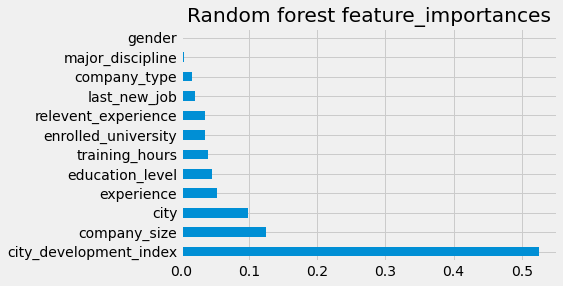

In [75]:
feature_importances = pd.Series(rf_pipe.steps[1][1].feature_importances_, index=X_train.columns);
feature_importances.nlargest(15).plot(kind='barh');
plt.title('Random forest feature_importances');

In [76]:
rf_train_predict = rf_pipe.predict(X_train)

dt_train_predict = dt_pipe.predict(X_train)

In [77]:
print('Random Forest classification_report on train_set')
print(' ')
print(classification_report(train_labels, rf_train_predict))

Random Forest classification_report on train_set
 
              precision    recall  f1-score   support

         0.0       0.84      0.90      0.87     14381
         1.0       0.60      0.47      0.53      4777

    accuracy                           0.79     19158
   macro avg       0.72      0.68      0.70     19158
weighted avg       0.78      0.79      0.78     19158



In [78]:
print('Decision Tree classification_report on train_set')
print(' ')
print(classification_report(train_labels, dt_train_predict))

Decision Tree classification_report on train_set
 
              precision    recall  f1-score   support

         0.0       0.84      0.89      0.87     14381
         1.0       0.60      0.50      0.55      4777

    accuracy                           0.79     19158
   macro avg       0.72      0.70      0.71     19158
weighted avg       0.78      0.79      0.79     19158



In [79]:
rf_probs = rf_pipe.predict_proba(X_train)
rf_probs = rf_probs[:, 1]

dt_probs = dt_pipe.predict_proba(X_train)
dt_probs = dt_probs[:, 1]

In [80]:
auc_RF_train = roc_auc_score(train_labels, rf_probs)
auc_dt_train = roc_auc_score(train_labels, dt_probs)

print('Random forest auc on train set',auc_RF_train)
print('Decision tree auc on train set',auc_dt_train)

Random forest auc on train set 0.8234264612247945
Decision tree auc on train set 0.8155843303062646


In [97]:
train.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,5,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,77,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,64,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,14,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,50,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
